In this notebook, we present the official solution for Task of the **DataCorp: Mystery Data Science Journey**. As junior data scientists, our objective was to explore a mysterious dataset containing information about Titanic passengers, uncovering its secrets to lay the groundwork for further analysis.

This task focused on **data exploration and cleaning**, essential steps in any data science project. We began by loading the Titanic dataset and examining its structure, identifying the various features and checking for missing values. By addressing these missing values appropriately, we ensured the dataset was clean and reliable for subsequent analyses.

To aid in understanding the dataset, we generated visualizations that illustrate key characteristics such as age distribution, gender representation, and passenger class distribution. These insights not only provide a deeper understanding of the dataset but also set the stage for the feature engineering and analysis tasks that follow.

This notebook serves as a model solution, showcasing best practices in data exploration and cleaning. We encourage you to refer to it as a guide in your own analyses and projects.


# Task 1: Data Exploration and Cleaning

### Data Exploration: Understanding Your Dataset

**What it does**: Data exploration is the initial step in data analysis where you get a sense of the dataset's structure, features, and potential issues.

**Key Methods**:
- **`head()`**: Displays the first few rows of the dataset, providing a snapshot of the data.
- **`info()`**: Shows information about the dataset, including data types and non-null counts, helping to identify which features may need further cleaning.

**Why it matters**: Early exploration helps in understanding the nature of the data and informs decisions about the cleaning and analysis processes.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
# 1. Explore the Dataset
## Display the first few rows and basic info
print("Dataset preview:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Missing Values: Ensuring Data Quality

**What it does**: Missing values can lead to inaccurate model predictions. Identifying and addressing these gaps is crucial for maintaining data integrity.

**Methods**:
- **Checking for Missing Values**: Using `isnull().sum()` helps identify which columns have missing entries.
- **Filling Missing Values**: For the 'Age' column, filling missing values with the median (a measure of central tendency) ensures that the average age is preserved without being skewed by outliers.
- **Dropping Rows**: Removing rows with missing values in the 'Embarked' column can be justified if the column is critical for analysis and has a small proportion of missing data.

**Why it matters**: Proper handling of missing values prevents biases and inaccuracies in model predictions, ensuring a more reliable analysis.

In [4]:
# 2. Check for Missing Values and Handle Them
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
## Fill or Drop Missing Values
### Filling missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
### Dropping rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

### Summary Statistics: Gaining Insights

**What it does**: Summary statistics provide a quick overview of the dataset's numerical features, such as mean, median, standard deviation, and quartiles.

**Implementation**: The `describe()` method generates these statistics for numerical columns, helping to understand the distribution and variability of the data.

**Why it matters**: Understanding basic statistics is essential for identifying outliers, trends, and the overall distribution of features, which can inform further analysis and feature engineering.

In [7]:
# 3. Basic Statistics and Visualizations
## Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization: Communicating Findings

**What it does**: Visualization is a powerful tool for interpreting data and uncovering patterns. It translates complex data sets into visual formats that are easier to understand.

**Key Visualizations**:
- **Histograms**: The `histplot` for 'Age' provides insights into the age distribution of passengers, indicating the most common age ranges.
- **Count Plots**: `countplot` for 'Sex' and 'Pclass' show the distribution of passengers by gender and class, respectively, highlighting potential biases or trends in survival.

**Why it matters**: Effective visualizations not only reveal trends and relationships within the data but also aid in communicating findings to stakeholders, making it easier to convey complex insights clearly.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


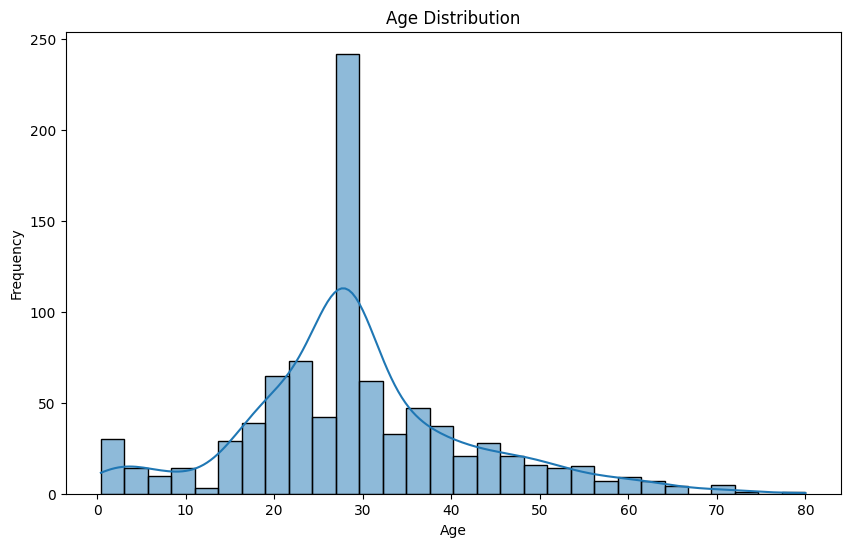

In [8]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

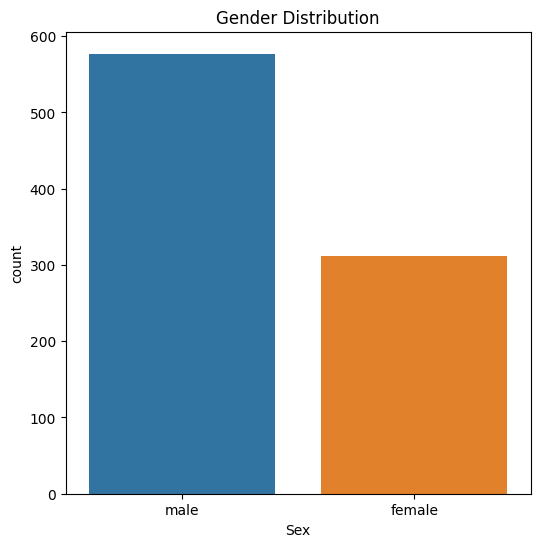

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

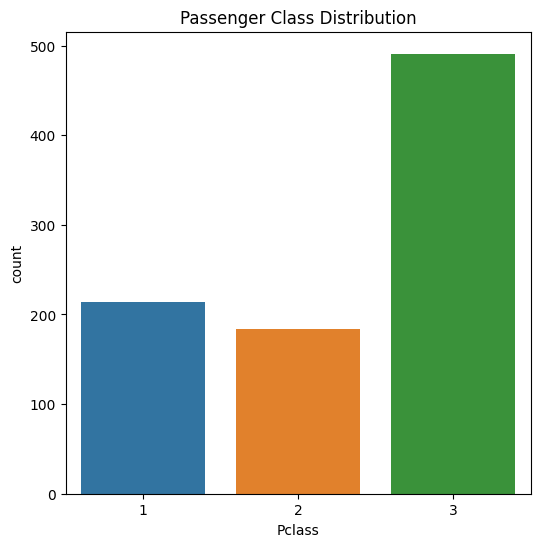

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()

## Task 2: Feature Engineering and Simple Data Analysis

In [11]:
from sklearn.preprocessing import LabelEncoder

### Encoding Categorical Variables: Why It Matters

**What it does**: Categorical encoding transforms categorical variables (like 'Sex' or 'Embarked') into a numerical format that machine learning algorithms can understand.

**Label Encoding**: This technique assigns a unique integer to each category. For example, 'male' might be encoded as 1 and 'female' as 0. This method works well for ordinal data but can mislead algorithms if the categories have no intrinsic order.

**One-Hot Encoding**: This approach creates separate binary columns for each category. For instance, if there are three embarkation points (C, Q, S), one-hot encoding will create three columns, allowing the model to treat each category equally without implying any order.

**Why it matters**: Proper encoding is essential for the performance of the model. Inappropriate encoding can lead to incorrect assumptions about the relationships between features.

In [12]:
# 1. Encoding Categorical Variables
## Label Encoding for 'Sex' column
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

In [13]:
## One-Hot Encoding for 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

### Feature Engineering: Enhancing Model Inputs

**What it does**: Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models.

**Creating Age Groups**: By categorizing ages into groups like "Child," "Teen," "Adult," and "Elderly," we simplify the analysis and can identify survival patterns among different age demographics. This transformation can improve the model's ability to learn relevant patterns.

**Why it matters**: Effective feature engineering can significantly enhance model performance. By using more informative features, the model can make better predictions, leading to higher accuracy and reliability.

In [14]:
# 2. Creating New Features
## Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 80], labels=['Child', 'Teen', 'Adult', 'Elderly'])

### Group-Wise Analysis: Understanding Relationships

**What it does**: Group-wise analysis aggregates data to discover relationships and trends within subgroups, such as survival rates based on 'Pclass' (passenger class) and 'Sex'.

**Implementation**: By grouping the data and calculating the mean survival rate for each combination of class and gender, we can visualize how different factors influence survival. 

**Why it matters**: Understanding these relationships helps in formulating hypotheses about survival factors and can guide further feature engineering or model adjustments.

In [15]:
# 3. Group-Wise Analysis
## Correlation between class, gender, and survival
grouped_data = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival Rates by Class and Gender:")
print(grouped_data)

Survival Rates by Class and Gender:
Sex       female      male
Pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


### Data Visualization: The Power of Representation

**What it does**: Visualization techniques, such as heatmaps and bar plots, graphically represent data to reveal patterns and insights that might not be apparent from raw numbers.

**Heatmaps**: By displaying survival rates across different classes and genders, heatmaps provide an immediate visual representation of where the most significant impacts lie.

**Bar Plots**: These help visualize categorical data distributions, such as survival rates across age groups, making it easier to interpret the results.

**Why it matters**: Effective visualization aids in understanding data distributions and relationships, providing a clear overview that can inform decision-making and further analysis.

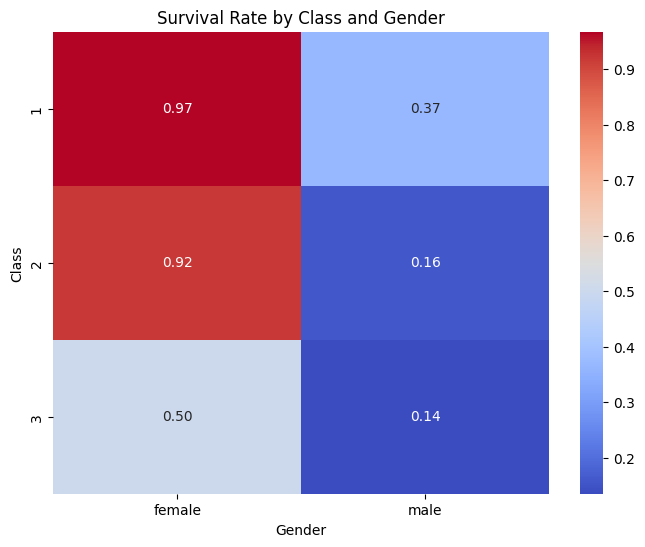

In [16]:
# 4. Visualizations
## Heatmap of survival rates by class and gender
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Gender')
plt.ylabel('Class')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


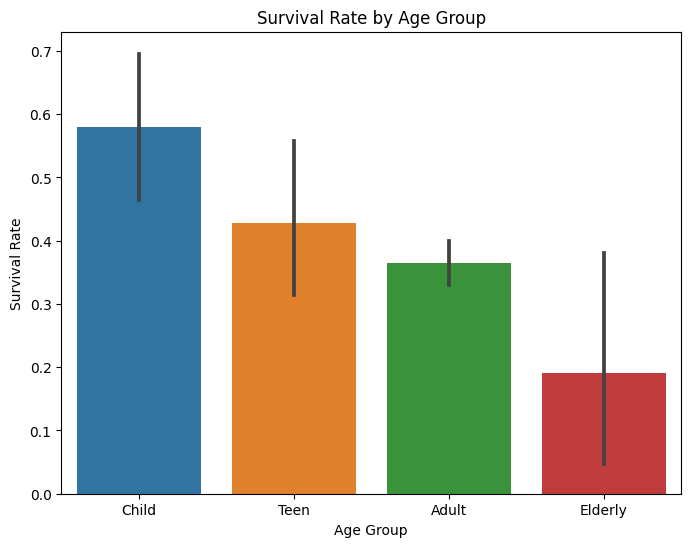

In [17]:
# Survival by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Task 3: Building a Simple Predictive Model

### Logistic Regression: The Math Behind It

**What it does**: Logistic regression predicts the probability that a given data point belongs to a particular category (like survival or not). It’s used in binary classification problems.

**How it works**: Instead of predicting directly with a line, logistic regression uses a *sigmoid function*, which squashes the output to values between 0 and 1, representing a probability. If the probability is above 0.5, the model predicts one category (e.g., "survived"), and if it’s below 0.5, it predicts the other.

The sigmoid function is defined as:
$$
\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$
where $ z = \text{(coefficients} \times \text{features)} + \text{intercept} $. This formula converts the linear combination of features into a probability.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# 1. Prepare Features (X) and Labels (y)
## Select relevant columns for the model
X = df[['Pclass', 'Sex_encoded', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

### Train-Test Split: Why Do We Need It?

**What it does**: The train-test split separates data into training and testing sets. The model learns patterns on the training set and is then tested on unseen data in the test set to check if it generalizes well.

**Why it’s important**: If we only test on the data we trained on, the model might “memorize” instead of learning actual patterns, leading to overfitting (when the model performs well on training data but poorly on new data).

In [20]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 3. Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# 4. Model Evaluation
## Predictions
y_pred = model.predict(X_test)

In [23]:
## Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7752808988764045


### Confusion Matrix: Understanding Model Predictions

**What it does**: The confusion matrix summarizes prediction results by comparing actual and predicted values. It has four sections:
- **True Positive (TP)**: Predicted “survived” and actually survived.
- **True Negative (TN)**: Predicted “did not survive” and actually did not survive.
- **False Positive (FP)**: Predicted “survived” but did not survive (also known as a Type I error).
- **False Negative (FN)**: Predicted “did not survive” but actually survived (also known as a Type II error).

This helps you see not just accuracy but also where the model might be making the most mistakes.

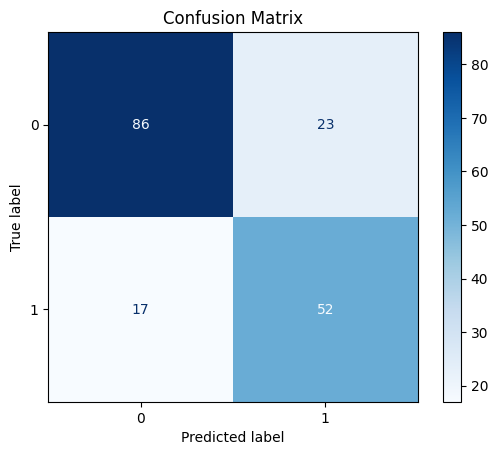

In [27]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



### ROC Curve and AUC: How Good Is the Model at Distinguishing?

**What it does**: The ROC (Receiver Operating Characteristic) Curve shows the balance between the **True Positive Rate (Sensitivity)** and the **False Positive Rate** as the threshold for classification changes.

**AUC (Area Under the Curve)**: AUC quantifies the ROC curve into a single value between 0 and 1. A higher AUC indicates better model performance in distinguishing between the two classes, with 1 being a perfect score.

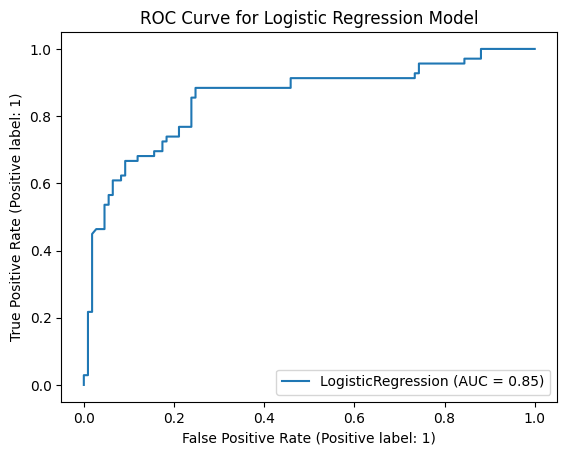

In [29]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve for Logistic Regression Model")
plt.show()

### Feature Coefficients: What Influences the Prediction?

**What it does**: In logistic regression, each feature (like age or class) has a **coefficient** that shows its impact on the prediction. Positive coefficients push the outcome toward “survived,” while negative coefficients lean it toward “did not survive.”

**Why it matters**: Knowing which features have the strongest impact on predictions helps interpret the model and understand what factors might contribute most to survival, a concept called **model interpretability**.

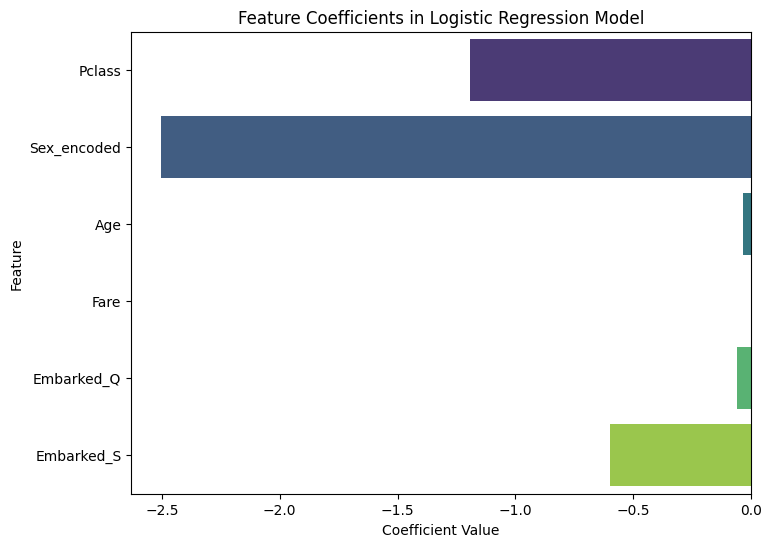

In [30]:
# Coefficient Plot
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
plt.figure(figsize=(8, 6))
sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Coefficients in Logistic Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()